# Covariance Estimation

In [1]:
import os
import sys
from pathlib import Path

repo_root = Path(os.getcwd()).parent
sys.path.insert(0, str(repo_root))

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

from pipeline import harmony
from harmonia.surveyor.synthesis import CovarianceEstimator
from harmonia.utils import covar_to_corr

plt.style.use(harmony)

In [3]:
case = 'partial-sky'  # 'partial-sky'

if case == 'full-sky':
    info = "mask=1.0,selection=None"
if case == 'partial-sky':
    info = "mask=BOSS_CMASS_North,selection=[100.0,500.0]"

In [4]:
storage = repo_root/"storage"/"processed"/"survey_products"

covar_estimator = CovarianceEstimator.load(
    storage/
    "covar-estimate-(source=1-2500,map=cartesian,boxsize=1000.0,scale=[None,0.09],orders=[0],{}).npz".format(info)
)

In [5]:
print(covar_estimator.wavenumbers)

[0.00679263 0.01626636 0.02638885 0.03562137 0.04532507 0.05516875
 0.06503194 0.07514892]


[2020-07-26 22:31:50 (+0:00:01) INFO] NumExpr defaulting to 8 threads.


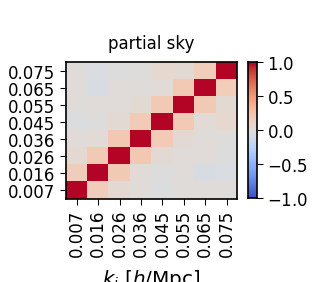

In [6]:
cmap = LinearSegmentedColormap.from_list(
    "abyss", 
    [(0.1, 0.6, 1.0), (0.05, 0.05, 0.05), (0.8, 0.5, 0.1)]
)

k_bins = ["{:.3f}".format(k) for k in covar_estimator.wavenumbers]
# k_bins = list(range(1, 9))

fig = plt.figure(figsize=(3.2, 3.5), dpi=100)

ax = sns.heatmap(
    np.flipud(covar_to_corr(covar_estimator.get_fiducial_covariance('order'))),
    vmin=-1., vmax=1., center=0., cmap='coolwarm', square=True,
    xticklabels=k_bins, yticklabels=list(reversed(k_bins)),
    cbar_kws={
        'use_gridspec': False,
        'shrink': 0.75,
        'ticks': np.r_[np.arange(-1., 1., 0.5), 1.]
        # 'location': 'top',
    }
)
    
ax.set_xlabel(r'$k_i$ [$h$/Mpc]', labelpad=8);
ax.set_ylabel(r'$k_j$ [$h$/Mpc]', labelpad=8);
ax.xaxis.tick_bottom();
ax.yaxis.tick_left();
ax.tick_params(which='both', direction='out')
ax.set_title('{}'.format(case.replace("-", " ")), pad=10, fontsize=12)
for _, spine in ax.spines.items():
    spine.set_visible(True)

cax = plt.gcf().axes[-1]
cax.tick_params(direction='out')
cax.set_frame_on(True)

fig.savefig(repo_root/"notebooks"/"publications"/"monopole_covar_{}.pdf".format(case))